# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,2.600832e+04,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,4.359979e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,3.162002e+04,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,9.060000e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

### почистим датасет от столбцов, в которых большинство значений (больше 40000) 0 или NaN

In [5]:
df.dropna(subset=["gender"], axis=0, inplace=True)

In [6]:
df.drop(['ml_balance'], axis=1, inplace=True)

In [7]:
df.drop(['cl_balance_0m'], axis=1, inplace=True)

In [8]:
df.drop(['loan_balance_0m'], axis=1, inplace=True)

In [9]:
df.drop(['td_balance_0m'], axis=1, inplace=True)

In [10]:
df.drop([
'min_casa_balance_1q',
'max_casa_balance_1q',
'min_td_balance_1q',
'max_td_balance_1q',
'min_loan_balance_1q',
'max_loan_balance_1q',
'min_cl_balance_1q',
'max_cl_balance_1q',
], axis=1, inplace=True)

### Заменим NaN значения на 0

In [11]:
df['Avg_trx'].replace(np.nan, 0.0, inplace=True)

In [12]:
df['avgtrx_to_balance'].replace(np.nan, 0.0, inplace=True)

In [13]:
df['loan_to_deposit'].replace(np.nan, 0.0, inplace=True)

In [14]:
df.drop(['loan_to_deposit'], axis=1, inplace=True)

In [15]:
df.describe(include='all')

,age,gender,city_type,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
count,49277.000000,49277,49277,49277.000000,4.927700e+04,49277.000000,4.927700e+04,4.927700e+04,4.927700e+04,4.927700e+04,4.927700e+04,4.927700e+04,4.927700e+04,4.927700e+04,4.691000e+04
unique,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,М,<100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25403,15211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,41.619356,NaN,NaN,54.053209,6.748250e+04,105.144185,2.190085e+05,2.549114e+04,6.443876e+04,7.126348e+04,7.957675e+04,5.579960e+04,3.320003e+03,2.105179e+02,1.205842e+04
std,12.844941,NaN,NaN,47.493367,1.759309e+06,192.284390,5.895788e+05,4.385361e+05,1.910866e+06,1.120307e+06,2.755304e+05,1.724311e+05,1.290104e+04,2.345358e+04,4.546162e+04
min,4.000000,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,NaN,NaN,14.000000,3.308000e+01,0.000000,0.000000e+00,0.000000e+00,4.310817e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.717002e+02
50%,40.000000,NaN,NaN,38.000000,7.464000e+02,14.000000,3.400000e+04,0.000000e+00,3.011689e+03,0.000000e+00,0.000000e+00,0.000000e+00,7.279251e+02,6.156428e-02,1.390088e+03
75%,51.000000,NaN,NaN,81.000000,8.611900e+03,123.000000,2.608150e+05,3.151271e+04,1.286412e+04,0.000000e+00,5.278846e+03,0.000000e+00,2.446268e+03,5.338726e-01,9.871193e+03


### Для кластеризации воспользуемся пакетом KMeans

In [16]:
from sklearn.cluster import KMeans

### Выберем для кластеризации следующие столбцы

In [17]:
df[['age', 'gender', 'city_type', 'income']]

,age,gender,city_type,income
5,72,М,Mega,0.00
9,36,М,<100,22100.00
10,56,F,<100,36694.37
11,19,М,100-500,1293.60
12,20,F,1M+,44169.00
...,...,...,...,...
49995,57,F,<100,0.00
49996,58,F,Mega,0.00
49997,34,М,1M+,12405.50
49998,43,М,<100,0.00


### вынесем из в отдельный датафрейм

In [18]:
df_clustering = df[['age', 'gender', 'city_type','income']].copy()
df_clustering['gender'].replace('М', 0, inplace=True)
df_clustering['gender'].replace('F', 1, inplace=True)
df_clustering['city_type'].replace('<100', 99, inplace=True)
df_clustering['city_type'].replace('100-500', 499, inplace=True)
df_clustering['city_type'].replace('500-1000', 999, inplace=True)
df_clustering['city_type'].replace('Mega', 999999, inplace=True)
df_clustering['city_type'].replace('1M+', 1000001, inplace=True)
df_clustering

,age,gender,city_type,income
5,72,0,999999,0.00
9,36,0,99,22100.00
10,56,1,99,36694.37
11,19,0,499,1293.60
12,20,1,1000001,44169.00
...,...,...,...,...
49995,57,1,99,0.00
49996,58,1,999999,0.00
49997,34,0,1000001,12405.50
49998,43,0,99,0.00


### Сформируем 5 кластеров

In [19]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

### добавим их отдельной колонкой в исходный датасет

In [20]:
df_copy = df.copy()
df_copy.insert(0, 'Cluster Labels', kmeans.labels_)
df_copy.head()

,Cluster Labels,age,gender,city_type,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
5,0,72,М,Mega,50,93690.801,0,0.00,0.00,93131.782817,0.0,0.000000,0.0,0.000000,0.000000,2433.644326
9,1,36,М,<100,154,0.000,83,324947.73,22100.00,893.147500,0.0,38051.374167,0.0,3915.032892,4.383411,6065.052515
10,1,56,F,<100,165,1524.580,341,451481.51,36694.37,5844.510000,70000.0,43218.413333,0.0,1323.992698,0.226536,8009.940315
11,1,19,М,100-500,40,19.650,72,15529.58,1293.60,217.270833,0.0,0.000000,0.0,215.688611,0.992718,684.233442
12,0,20,F,1M+,3,10338.170,105,126229.83,44169.00,19043.322500,0.0,0.000000,0.0,1202.188857,0.063129,157.694118


In [21]:
df_copy['Cluster Labels'].value_counts()

1    32793
0    16477
4        5
3        1
2        1
Name: Cluster Labels, dtype: int64

### проанализируем полученные кластеры

In [22]:
df_copy.loc[df_copy['Cluster Labels'] == 0, 'income'].describe()

count    1.647700e+04
mean     2.433298e+04
std      5.966933e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.924983e+04
max      1.326616e+06
Name: income, dtype: float64

/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


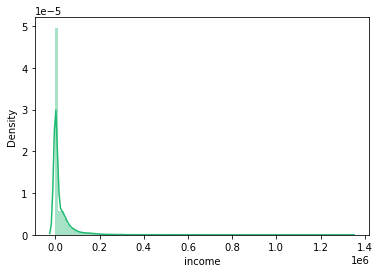

In [23]:
sns.distplot(df_copy.loc[df_copy['Cluster Labels'] == 0, 'income'], color='#21BA72', bins=100, hist_kws={'alpha': 0.4});

Кластер 0: с доходами клиентов от 0 до 1371710

In [24]:
df_copy.loc[df_copy['Cluster Labels'] == 1, 'income'].describe()

count    3.279300e+04
mean     2.179123e+04
std      4.270069e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.258766e+04
max      1.371710e+06
Name: income, dtype: float64

/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


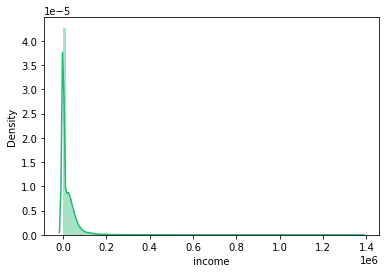

In [25]:
sns.distplot(df_copy.loc[df_copy['Cluster Labels'] == 1, 'income'], color='#21BA72', bins=100, hist_kws={'alpha': 0.4});

Кластер 1: с доходами клиентов от 0 до 326616

In [26]:
df_copy.loc[df_copy['Cluster Labels'] == 2, 'income'].describe()

count           1.0
mean     90600000.0
std             NaN
min      90600000.0
25%      90600000.0
50%      90600000.0
75%      90600000.0
max      90600000.0
Name: income, dtype: float64

Кластер 2: с одним клиентом с доходом 90600000

In [27]:
df_copy.loc[df_copy['Cluster Labels'] == 3, 'income'].describe()

count           1.0
mean     33063482.0
std             NaN
min      33063482.0
25%      33063482.0
50%      33063482.0
75%      33063482.0
max      33063482.0
Name: income, dtype: float64

Кластер 3: с одним клиентом с доходом 33063482

In [28]:
df_copy.loc[df_copy['Cluster Labels'] == 4,  'income'].describe()

count    5.000000e+00
mean     3.385799e+06
std      1.206950e+06
min      1.900000e+06
25%      2.704759e+06
50%      3.216500e+06
75%      4.107734e+06
max      5.000000e+06
Name: income, dtype: float64

Кластер 4: с пятью клиентами с доходами от 1900000 до 5000000

## Графики из тех, что были на уроке
### Линейная диаграмма 

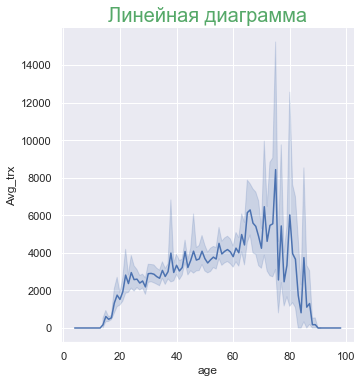

In [29]:
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='Avg_trx', 
    data=df, 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

In [30]:
df['city_type'].value_counts()

<100        15211
100-500     10660
Mega         8633
1M+          7847
500-1000     6926
Name: city_type, dtype: int64

In [31]:
city_order = ['<100', '100-500', '500-1000', 'Mega', '1M+']

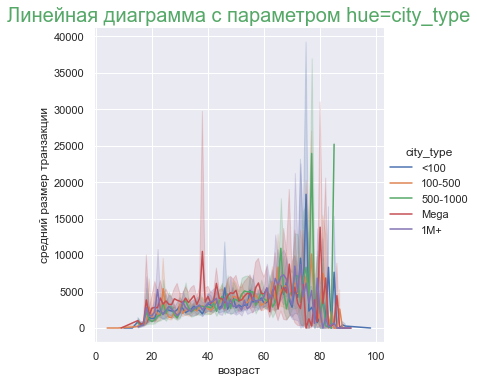

In [32]:
sns.relplot(
    x='age', 
    y='Avg_trx', 
    hue='city_type', 
    hue_order=city_order,
    data=df, 
    kind='line')
plt.xlabel('возраст')
plt.ylabel('средний размер транзакции')
plt.title('Линейная диаграмма с параметром hue=city_type', size=20, color='g');

In [33]:
df['gender'].value_counts()

М    25403
F    23874
Name: gender, dtype: int64

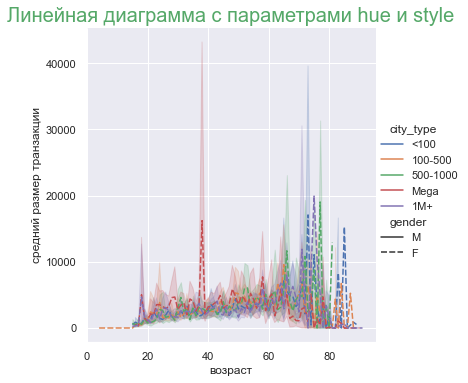

In [34]:
sns.relplot(
    x='age', 
    y='Avg_trx', 
    hue='city_type', 
    hue_order=city_order,
    style='gender',
    style_order=['M', 'F'],
    data=df, 
    kind='line')
plt.xlabel('возраст')
plt.ylabel('средний размер транзакции')
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

### Линейные диаграммы с отношением один ко многим

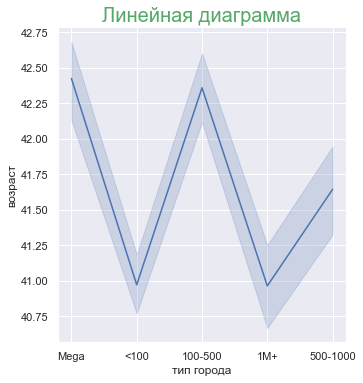

In [35]:
sns.relplot(
    x='city_type', 
    y='age',
    data=df, 
    kind='line')
plt.xlabel('тип города')
plt.ylabel('возраст')
plt.title('Линейная диаграмма', size=20, color='g');

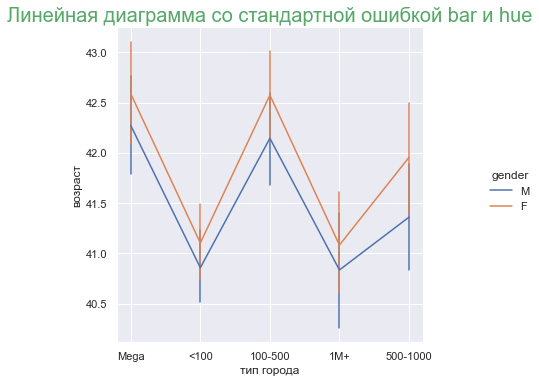

In [36]:
sns.relplot(
    x='city_type', 
    y='age',
    hue='gender',
    data=df, 
    kind='line',
    err_style='bars',
    ci=99)
plt.xlabel('тип города')
plt.ylabel('возраст')
plt.title('Линейная диаграмма со стандартной ошибкой bar и hue', size=20, color='g');

Добавим две колонки с признаками наличия ипотеки и потребительского кредита

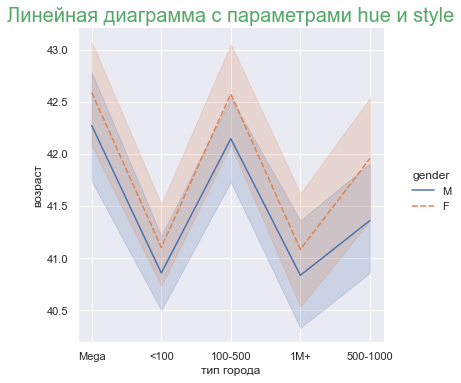

In [37]:
sns.relplot(
    x='city_type', 
    y='age',
    hue='gender',
    style='gender',
    data=df, 
    kind='line',
    ci=99)
plt.xlabel('тип города')
plt.ylabel('возраст')
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

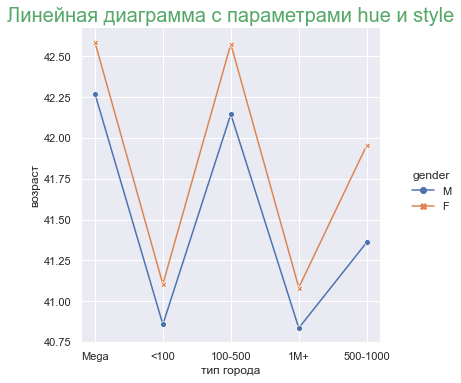

In [38]:
sns.relplot(
    x='city_type', 
    y='age',
    hue='gender',
    style='gender',
    dashes=False, 
    markers=True,
    data=df, 
    kind='line',
    ci=None)
plt.xlabel('тип города')
plt.ylabel('возраст')
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

### Создание длинного датафрейма из датафрейма широкой формы

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49277 entries, 5 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49277 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            49277 non-null  object 
 3   full_mob             49277 non-null  int64  
 4   casa_balance_0m      49277 non-null  float64
 5   dc_trx_cnt           49277 non-null  int64  
 6   dc_trx_sum           49277 non-null  float64
 7   income               49277 non-null  float64
 8   avg_casa_balance_1Y  49277 non-null  float64
 9   avg_td_balance_1Y    49277 non-null  float64
 10  avg_loan_balance_1Y  49277 non-null  float64
 11  avg_cl_balance_1Y    49277 non-null  float64
 12  Avg_trx              49277 non-null  float64
 13  avgtrx_to_balance    49277 non-null  float64
 14  nbi                  46910 non-null  float64
dtypes: float64(10), int64(3), object(2)


In [40]:
long_df = pd.melt(df, var_name='avg_balance', value_name='value',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 
                     'casa_balance_0m', 'dc_trx_cnt', 'dc_trx_sum', 
                     'income', 'Avg_trx', 'avgtrx_to_balance', 'nbi'])
long_df.shape         
long_df.sample(n=5)   

,age,gender,city_type,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,Avg_trx,avgtrx_to_balance,nbi,avg_balance,value
120150,29,F,1M+,2,343252.12,3,20655.00,139552.000,6885.000000,0.032973,1830.285438,avg_loan_balance_1Y,0.0
61685,40,М,Mega,81,500025.78,21,124132.98,152573.315,5911.094286,0.130821,23521.887345,avg_td_balance_1Y,0.0
119067,43,М,100-500,78,1992.06,0,0.00,0.000,0.000000,0.000000,1380.121200,avg_loan_balance_1Y,0.0
166665,66,F,1M+,95,193187.41,34,662443.00,38433.340,19483.617647,0.108461,33409.721771,avg_cl_balance_1Y,0.0
56740,50,М,100-500,105,130.65,51,1070687.02,127429.730,20993.863137,5.518733,NaN,avg_td_balance_1Y,0.0


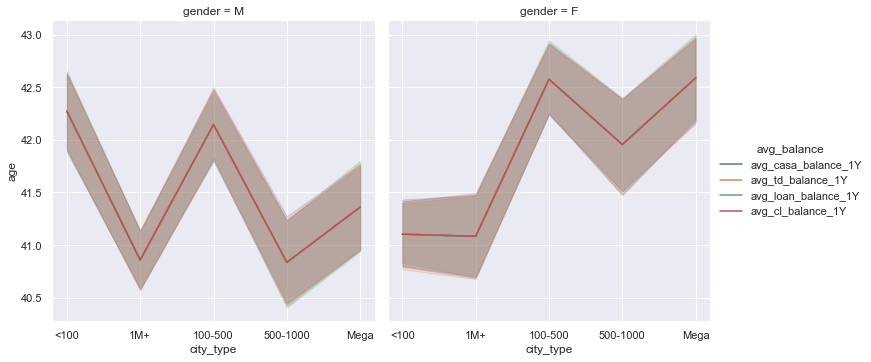

In [41]:
sns.relplot(
    x='city_type', 
    y='age',
    hue='avg_balance',
    data=long_df, 
    kind='line',
    col='gender'
)

Результат неочень потому, что датасет не подходит под это преобразование

### Scatterplot()

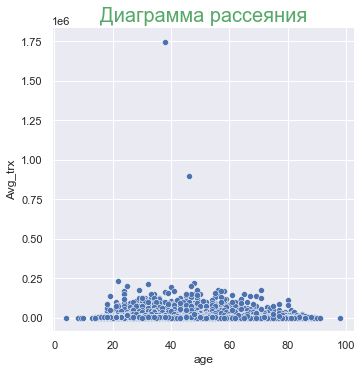

In [42]:
sns.relplot(
    x='age',
    y='Avg_trx',
    data=df
)
plt.title('Диаграмма рассеяния', size=20, color='g');

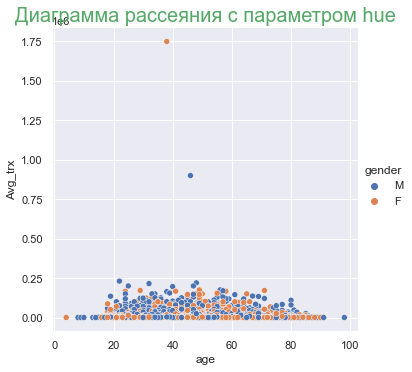

In [43]:
sns.relplot(
    x='age',
    y='Avg_trx',
    hue='gender',
    data=df
)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

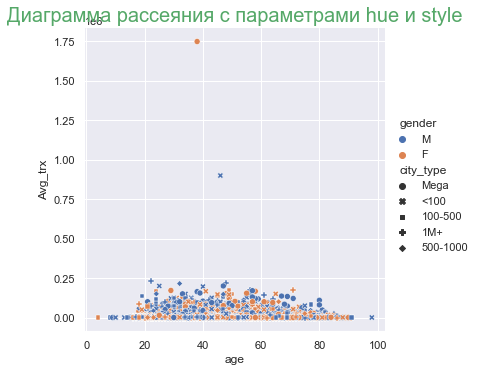

In [44]:
sns.relplot(
    x='age',
    y='Avg_trx',
    hue='gender',
    style='city_type',
    data=df
)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

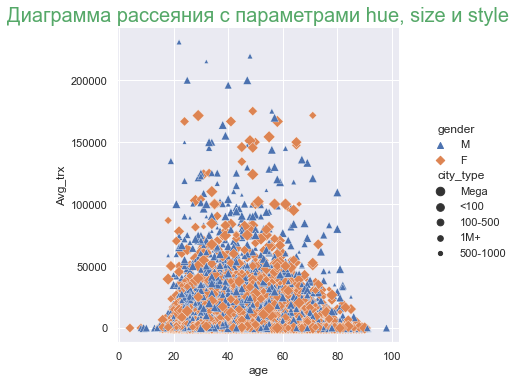

In [45]:
sns.relplot(
    x='age',
    y='Avg_trx',
    hue='gender',
    style='gender',
    size='city_type',
     markers=['^', 'D'],
    data=df.query('Avg_trx < 750000')
)
plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

### Диаграмма рассеяния с параметром Hue и дополнительными переменными

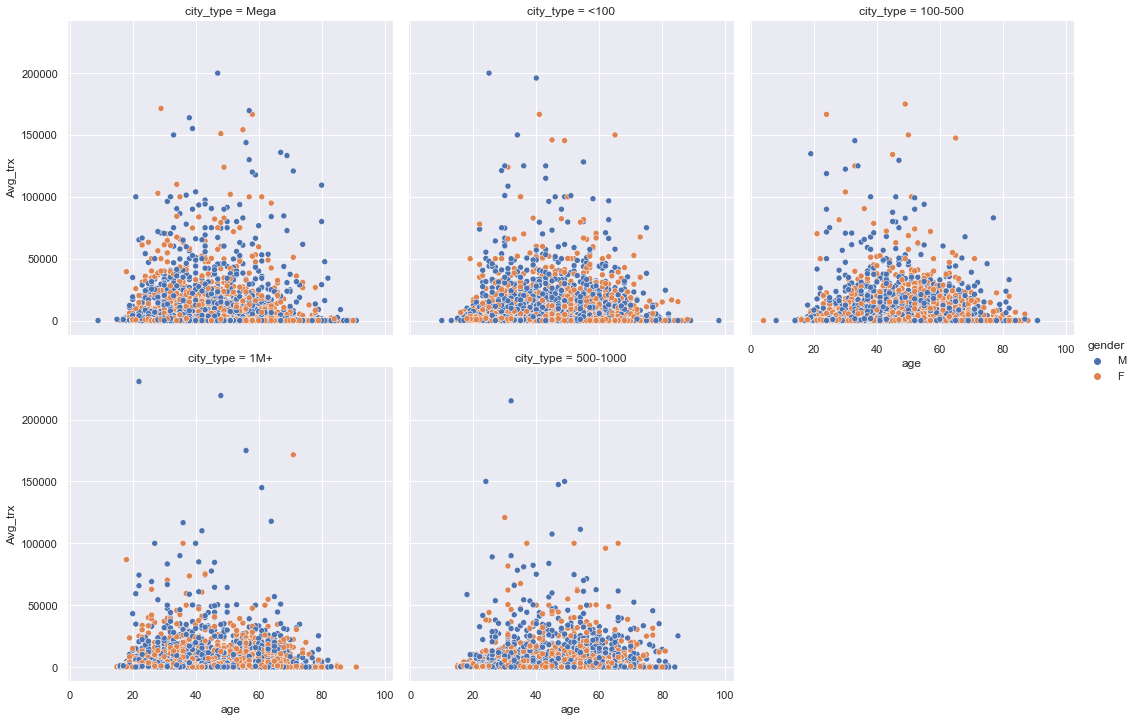

In [46]:
sns.relplot(
    x='age',
    y='Avg_trx',
    hue='gender',
    col='city_type',
    col_wrap=3,
    data=df.query('Avg_trx < 750000')
)

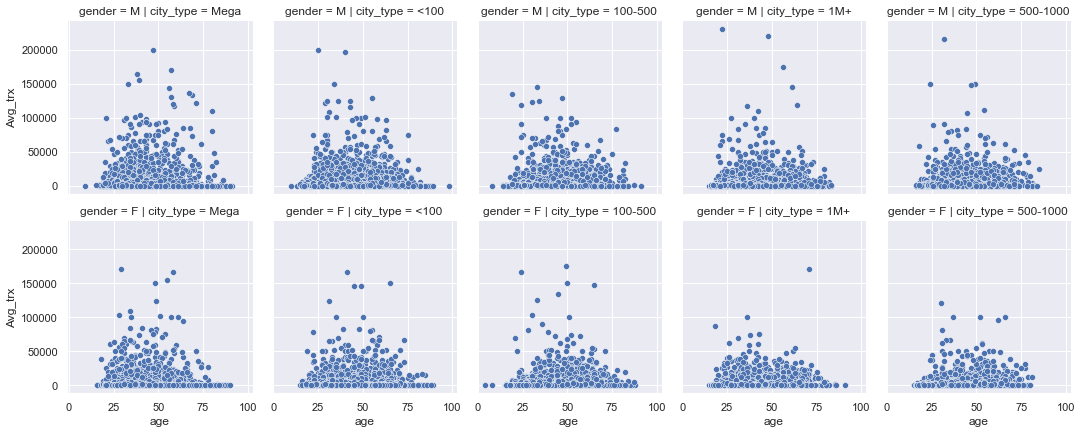

In [47]:
sns.relplot(
    x='age',
    y='Avg_trx',
    row='gender',
    col='city_type',
    height=3,
    data=df.query('Avg_trx < 750000')
)

### Категорийные диаграммы

In [48]:
sns.set(style="ticks", color_codes=True)

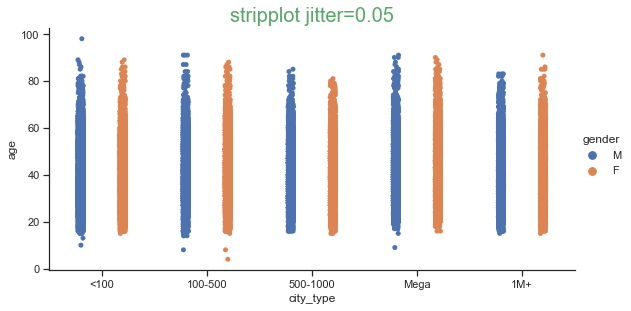

In [49]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df, 
    hue='gender',    # оба на одном графике разными цветами 
    order= ['<100', '100-500', '500-1000', 'Mega', '1M+'],
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

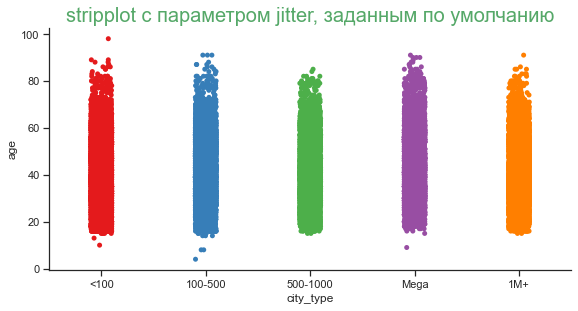

In [50]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df, 
    order= ['<100', '100-500', '500-1000', 'Mega', '1M+'],
    palette='Set1',
    height=4,
    aspect=2) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 94.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hasnobrains/opt/anaconda3

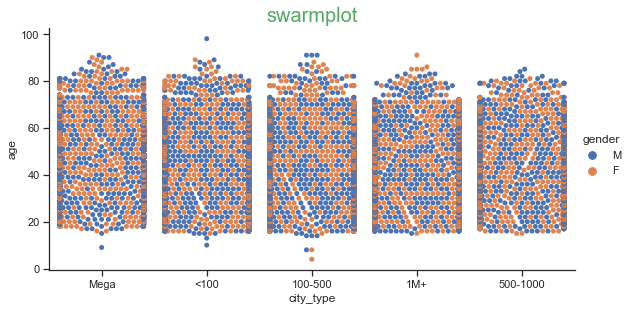

In [51]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df, 
    hue='gender',
    #order= ['<100', '100-500', '500-1000', 'Mega', '1M+'],
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

### boxplot

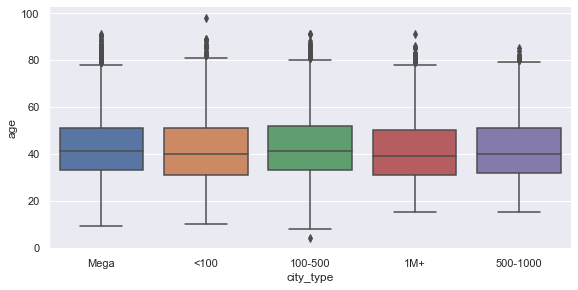

In [52]:
sns.set(style='darkgrid')
sns.catplot(
    x='city_type',
    y='age', 
    data=df, 
    kind='box', 
    height=4, 
    aspect=2
); 

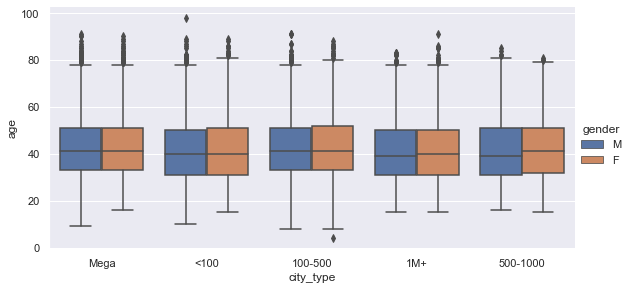

In [53]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df, 
    hue='gender',
    kind='box', 
    height=4, 
    aspect=2
); 

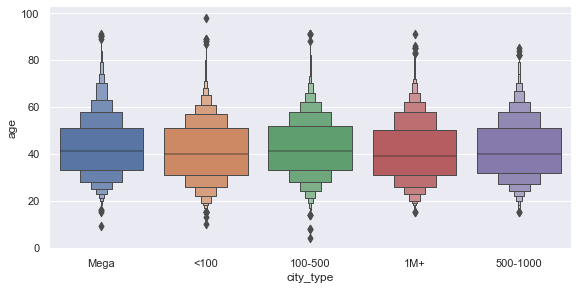

In [54]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df,
    kind='boxen', 
    height=4, 
    aspect=2
); 

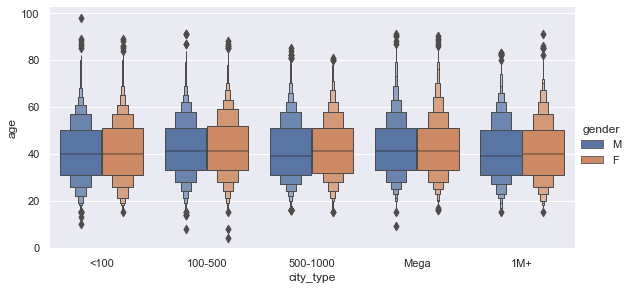

In [55]:
sns.catplot(
    x='city_type',
    y='age',
    hue='gender',
    order= ['<100', '100-500', '500-1000', 'Mega', '1M+'],
    data=df,
    kind='boxen', 
    height=4, 
    aspect=2
); 

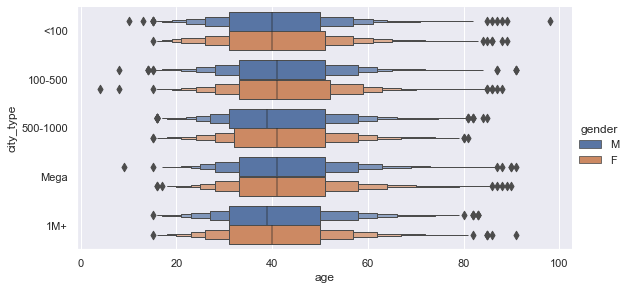

In [56]:
sns.catplot(
    x='age',
    y='city_type',
    hue='gender',
    order= ['<100', '100-500', '500-1000', 'Mega', '1M+'],
    data=df,
    kind='boxen', 
    height=4, 
    aspect=2
); 

### barplot

In [57]:
from numpy import median

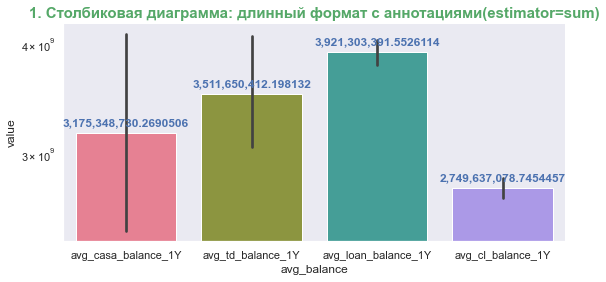

In [58]:
plt.figure(figsize=(9,4))
b = sns.barplot(
    x='avg_balance', 
    y='value', 
    data=long_df, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log')
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )
    
plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

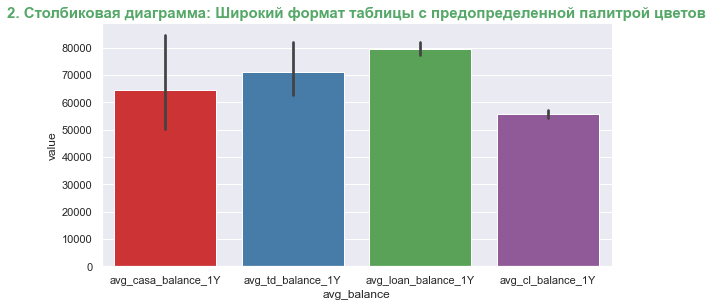

In [59]:
sns.catplot(
    x='avg_balance', 
    y='value', 
    data=long_df, 
    kind='bar', 
    height=4, 
    aspect=2,
    palette="Set1"
); 
plt.title('2. Столбиковая диаграмма: Широкий формат таблицы с предопределенной палитрой цветов', size=15, color='g', 
          weight='bold');

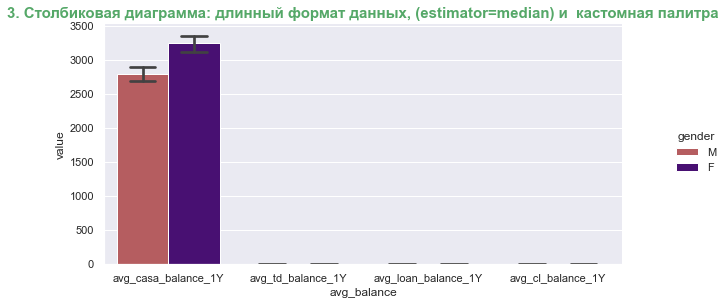

In [60]:
sns.catplot(
    x='avg_balance', 
    y='value', 
    data=long_df, 
    kind='bar', 
    hue='gender',
    hue_order=['М','F'], 
    palette={"М": "r", "F": "indigo"},
    estimator=median,
    capsize=0.2,
    height=4, 
    aspect=2
); 
plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

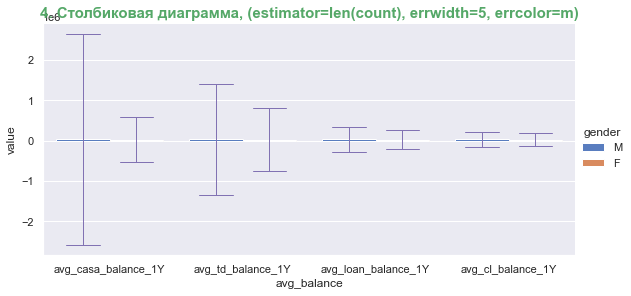

In [61]:
sns.catplot(
    x='avg_balance', 
    y='value', 
    data=long_df,
    kind='bar', 
    hue='gender', 
    ci='sd',
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1,
    palette="muted", 
    height=4, 
    aspect=2);
plt.title('4. Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)',
          size=15, 
          color='g', 
          weight='bold'
         );

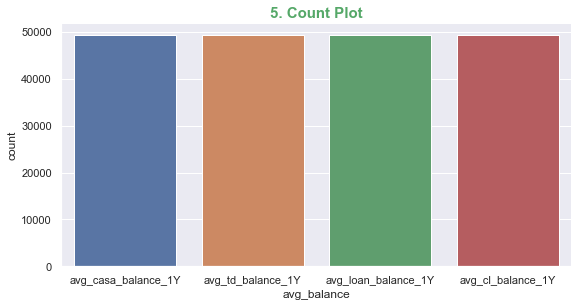

In [62]:
# Count Plot показывает количество наблюдений

sns.catplot(x='avg_balance', 
            data=long_df, 
            kind='count', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot', size=15, color='g', weight='bold');

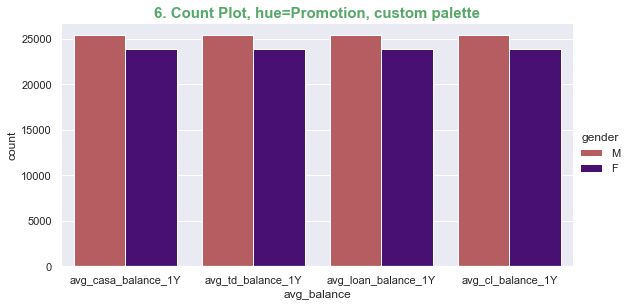

In [63]:
sns.catplot(
    x='avg_balance', 
    data=long_df, 
    kind='count', 
    hue='gender', 
    hue_order=['М','F'], 
    palette={"М": "r", "F": "indigo"},
    height=4, 
    aspect=2); 
plt.title('6. Count Plot, hue=Promotion, custom palette', size=15, color='g', weight='bold');

### violinplot

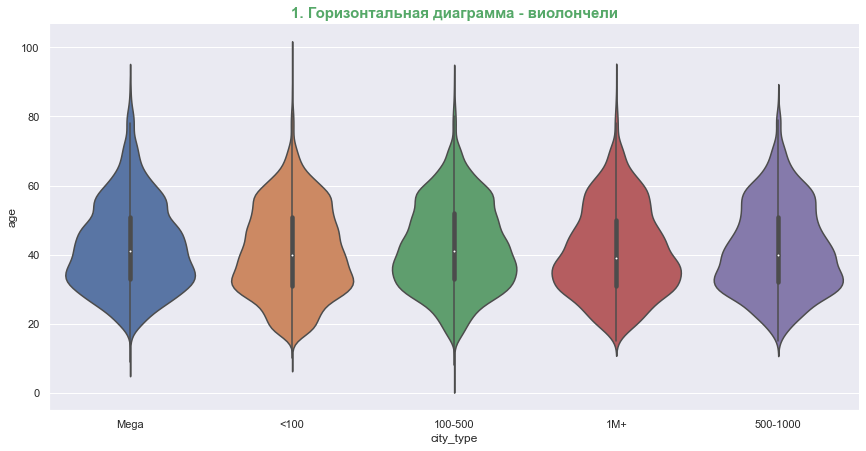

In [64]:
sns.catplot(
    x='city_type',
    y='age',
    data=df,
    kind='violin',
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

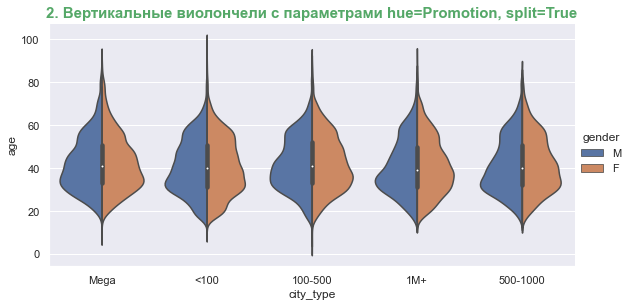

In [65]:
sns.catplot(
    x='city_type',
    y='age',
    data=df,
    kind='violin', 
    hue='gender', 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('2. Вертикальные виолончели с параметрами hue=Promotion, split=True', size=15, color='g', weight='bold');

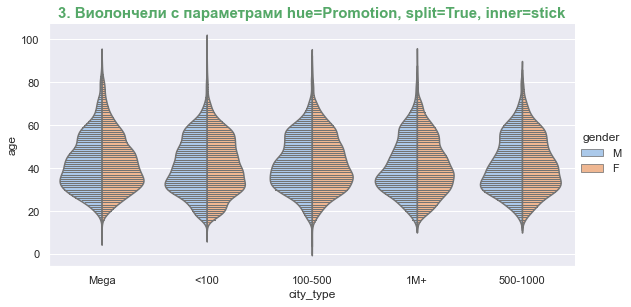

In [66]:
sns.catplot(
    x='city_type',
    y='age',
    data=df,
    kind='violin', 
    hue='gender', 
    split=True, 
    inner="stick", 
    palette="pastel",
    height=4, 
    aspect=2)
plt.title('3. Виолончели с параметрами hue=Promotion, split=True, inner=stick', size=15, color='g', weight='bold');

### pointplot

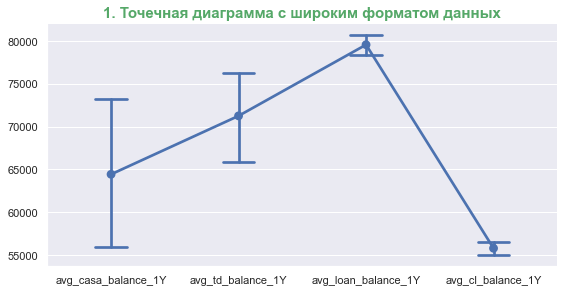

In [67]:
sns.catplot(
    data=df, 
    kind='point', 
    ci=68, 
    capsize=0.25, 
    height=4,        # wide form df
    aspect=2, 
    order=['avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y', 'avg_cl_balance_1Y']
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

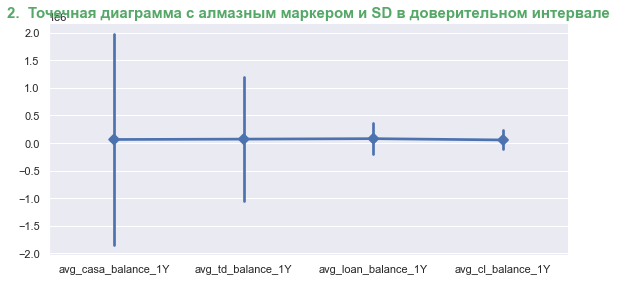

In [68]:
sns.catplot(
    data=df, 
    kind='point',  
    markers='D', 
    ci='sd',
    height=4, 
    aspect=2, 
    order=['avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y', 'avg_cl_balance_1Y'])  
plt.title('2.  Точечная диаграмма с алмазным маркером и SD в доверительном интервале', size=15, color='g', weight='bold');

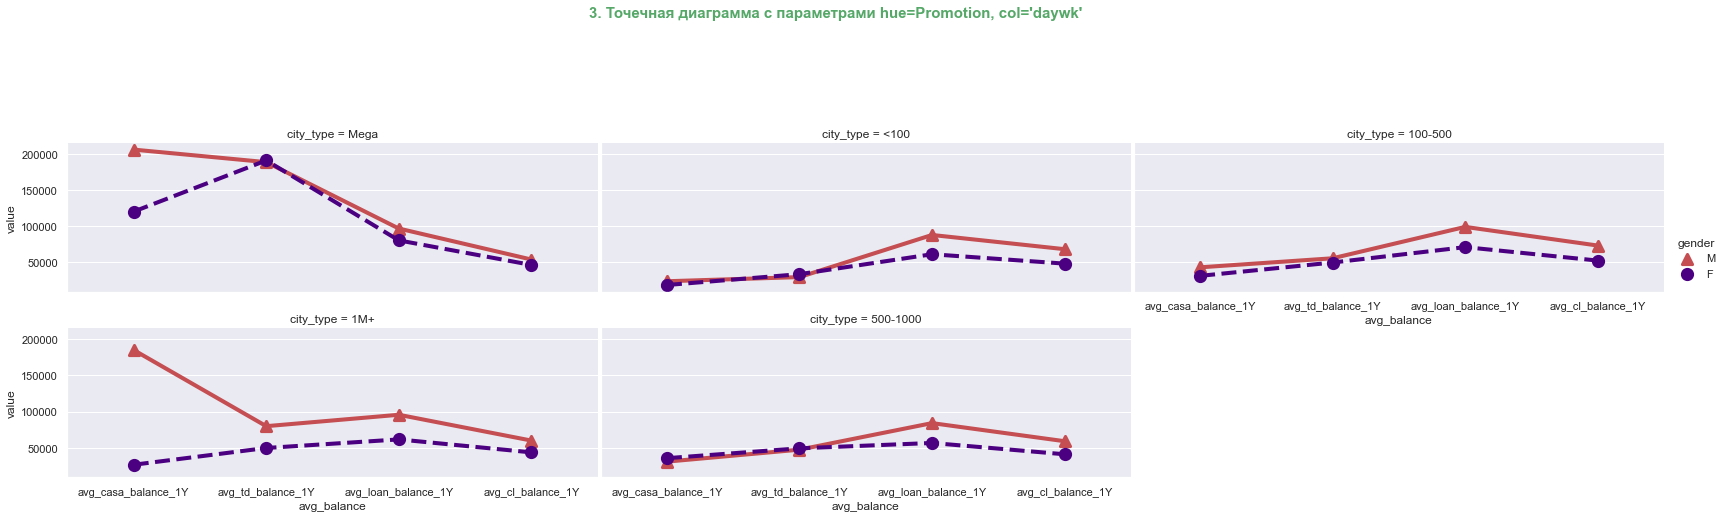

In [69]:
sns.catplot(
    x='avg_balance', 
    y='value', 
    data=long_df,
    kind='point', 
    hue='gender', 
    hue_order=['М','F'], 
    palette={"М": "r", "F": "indigo"},
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col='city_type', 
    col_wrap=3,
    height=4, 
    aspect=2, 
    scale=1.5)
plt.suptitle("3. Точечная диаграмма с параметрами hue=Promotion, col='daywk'", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

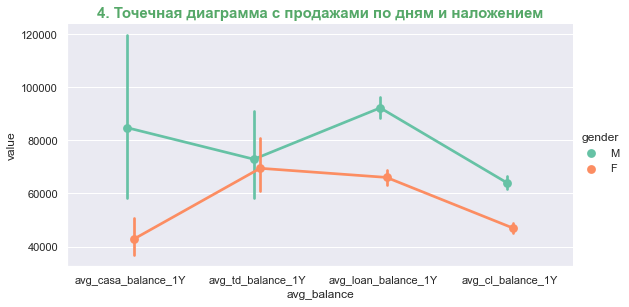

In [70]:
sns.catplot(
    x='avg_balance', 
    y='value', 
    data=long_df,
    kind='point', 
    hue='gender', 
    hue_order=['М','F'], 
    dodge=True,
    palette="Set2", 
    height=4, 
    aspect=2)
plt.title('4. Точечная диаграмма с продажами по дням и наложением', size=15, color='g', weight='bold');

### Диаграммы распределения

#### distplot() and rugplot()

/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


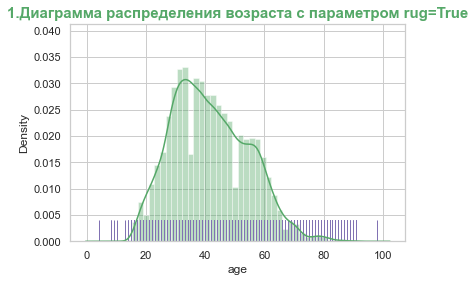

In [71]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.age,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения возраста с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hasnobrains/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


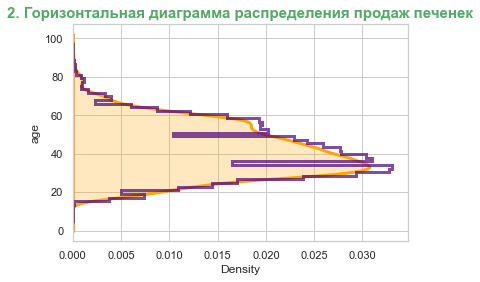

In [72]:
sns.distplot(
    df.age,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

#### pairplot()

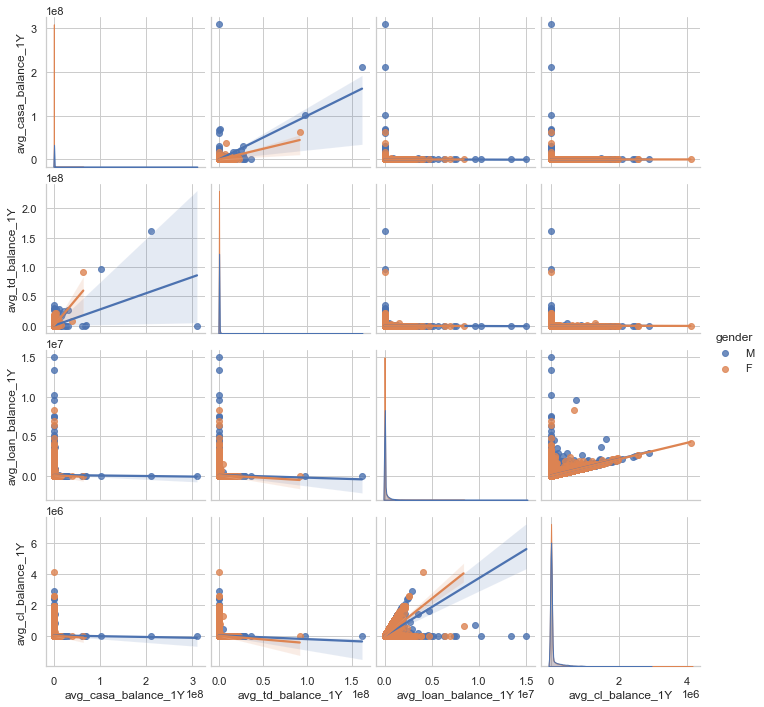

In [73]:
df_items = df.loc[:,['avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y', 'avg_cl_balance_1Y','gender']]
sns.pairplot(
    df_items,
    hue='gender',
    kind='reg'
)
plt.show();

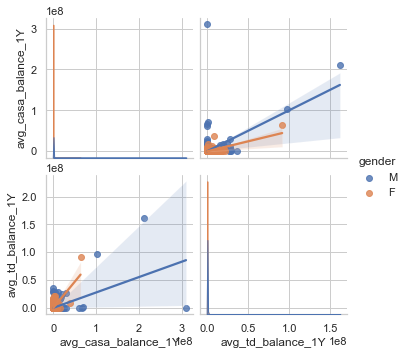

In [74]:
sns.pairplot(
    df_items,
    vars=['avg_casa_balance_1Y', 'avg_td_balance_1Y'],
    hue='gender', 
    kind='reg')
plt.show();

### PairGrid()

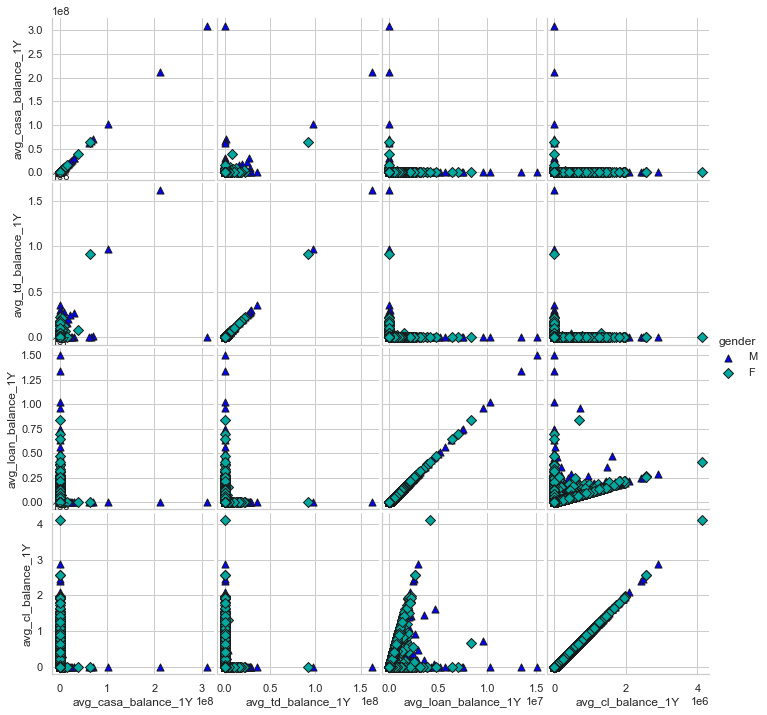

In [75]:
g = sns.PairGrid(
    df_items, 
    hue='gender', 
    hue_kws={"marker": ["^", "D"]}, 
    palette={'М': 'blue', 'F': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

## Матричные диаграммы
- heatmap()
- clustermap()

### Heatmap

In [76]:
long_df

,age,gender,city_type,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,Avg_trx,avgtrx_to_balance,nbi,avg_balance,value
0,72,М,Mega,50,93690.801,0,0.00,0.00,0.000000,0.000000,2433.644326,avg_casa_balance_1Y,93131.782817
1,36,М,<100,154,0.000,83,324947.73,22100.00,3915.032892,4.383411,6065.052515,avg_casa_balance_1Y,893.147500
2,56,F,<100,165,1524.580,341,451481.51,36694.37,1323.992698,0.226536,8009.940315,avg_casa_balance_1Y,5844.510000
3,19,М,100-500,40,19.650,72,15529.58,1293.60,215.688611,0.992718,684.233442,avg_casa_balance_1Y,217.270833
4,20,F,1M+,3,10338.170,105,126229.83,44169.00,1202.188857,0.063129,157.694118,avg_casa_balance_1Y,19043.322500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197103,57,F,<100,97,0.880,0,0.00,0.00,0.000000,0.000000,13775.933155,avg_cl_balance_1Y,0.000000
197104,58,F,Mega,34,0.000,0,0.00,0.00,0.000000,0.000000,8247.466438,avg_cl_balance_1Y,0.000000
197105,34,М,1M+,21,6450.930,73,118358.38,12405.50,1621.347671,0.179949,1973.128711,avg_cl_balance_1Y,0.000000
197106,43,М,<100,52,4101.120,0,0.00,0.00,0.000000,0.000000,5101.543269,avg_cl_balance_1Y,0.000000


In [77]:
sns.set(style='white')

# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
value = pd.DataFrame(long_df.groupby(["avg_balance", "city_type"]).value.mean())
value = value.reset_index()
value = value.pivot('city_type','avg_balance', 'value')
value.head()

avg_balance,avg_casa_balance_1Y,avg_cl_balance_1Y,avg_loan_balance_1Y,avg_td_balance_1Y
city_type,,,,
100-500,37131.784924,62772.693444,85000.415946,52590.797736
1M+,102942.884897,51441.797320,77933.456786,64187.315692
500-1000,33049.329167,50421.396051,70965.762644,48217.952811
<100,21330.856400,58820.913955,75370.406665,31363.480412
Mega,164296.047109,50141.650856,88693.037683,189543.287431


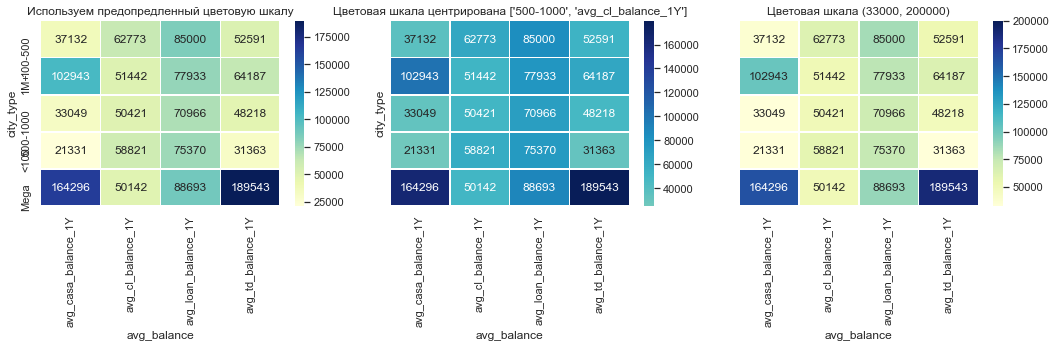

In [78]:
# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(
    value, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

sns.heatmap(
    value, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True,
    cmap="YlGnBu", 
    center=value.loc['500-1000', 'avg_cl_balance_1Y'], 
    yticklabels=False, 
    ax=ax2)

ax2.set_title("Цветовая шкала центрирована ['500-1000', 'avg_cl_balance_1Y']")

sns.heatmap(
    value, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True, 
    vmin=33000, 
    vmax=200000,
    cmap="YlGnBu", 
    yticklabels=False, 
    ax=ax3)
ax3.set(title='Цветовая шкала (33000, 200000)', ylabel='')

plt.tight_layout()
plt.show();

In [79]:
df

,age,gender,city_type,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
5,72,М,Mega,50,93690.801,0,0.00,0.00,93131.782817,0.0,0.000000,0.0,0.000000,0.000000,2433.644326
9,36,М,<100,154,0.000,83,324947.73,22100.00,893.147500,0.0,38051.374167,0.0,3915.032892,4.383411,6065.052515
10,56,F,<100,165,1524.580,341,451481.51,36694.37,5844.510000,70000.0,43218.413333,0.0,1323.992698,0.226536,8009.940315
11,19,М,100-500,40,19.650,72,15529.58,1293.60,217.270833,0.0,0.000000,0.0,215.688611,0.992718,684.233442
12,20,F,1M+,3,10338.170,105,126229.83,44169.00,19043.322500,0.0,0.000000,0.0,1202.188857,0.063129,157.694118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.880,0,0.00,0.00,2003.093333,1325809.0,0.000000,0.0,0.000000,0.000000,13775.933155
49996,58,F,Mega,34,0.000,0,0.00,0.00,0.000000,1000000.0,0.000000,0.0,0.000000,0.000000,8247.466438
49997,34,М,1M+,21,6450.930,73,118358.38,12405.50,9010.019167,0.0,0.000000,0.0,1621.347671,0.179949,1973.128711
49998,43,М,<100,52,4101.120,0,0.00,0.00,3787.540000,0.0,63442.406667,0.0,0.000000,0.000000,5101.543269


In [80]:
corr = df.corr()
corr

,age,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
age,1.000000,0.273232,0.026199,-0.120739,0.029059,0.009277,0.023107,0.072596,0.015842,0.009553,0.055768,-0.000019,0.059773
full_mob,0.273232,1.000000,0.011613,0.066438,0.117999,0.011267,0.011487,0.016409,0.146534,0.112390,0.027607,-0.004641,0.110000
casa_balance_0m,0.026199,0.011613,1.000000,0.028844,0.184485,0.007508,0.919765,0.689007,-0.006437,-0.007136,0.053951,-0.000344,0.772137
dc_trx_cnt,-0.120739,0.066438,0.028844,1.000000,0.473422,0.035640,0.028500,-0.003861,0.025762,0.061580,-0.052435,-0.004604,0.053506
dc_trx_sum,0.029059,0.117999,0.184485,0.473422,1.000000,0.053949,0.192359,0.096823,0.051259,0.069346,0.206245,-0.001205,0.262232
income,0.009277,0.011267,0.007508,0.035640,0.053949,1.000000,0.005956,0.002279,0.025123,0.035009,0.009497,-0.000441,0.024682
avg_casa_balance_1Y,0.023107,0.011487,0.919765,0.028500,0.192359,0.005956,1.000000,0.518013,-0.005040,-0.005775,0.045229,-0.000303,0.778032
avg_td_balance_1Y,0.072596,0.016409,0.689007,-0.003861,0.096823,0.002279,0.518013,1.000000,-0.017002,-0.019208,0.049801,0.000258,0.604717
avg_loan_balance_1Y,0.015842,0.146534,-0.006437,0.025762,0.051259,0.025123,-0.005040,-0.017002,1.000000,0.651248,0.017500,0.000341,0.361129
avg_cl_balance_1Y,0.009553,0.112390,-0.007136,0.061580,0.069346,0.035009,-0.005775,-0.019208,0.651248,1.000000,0.020422,-0.002496,0.389446


<AxesSubplot:>

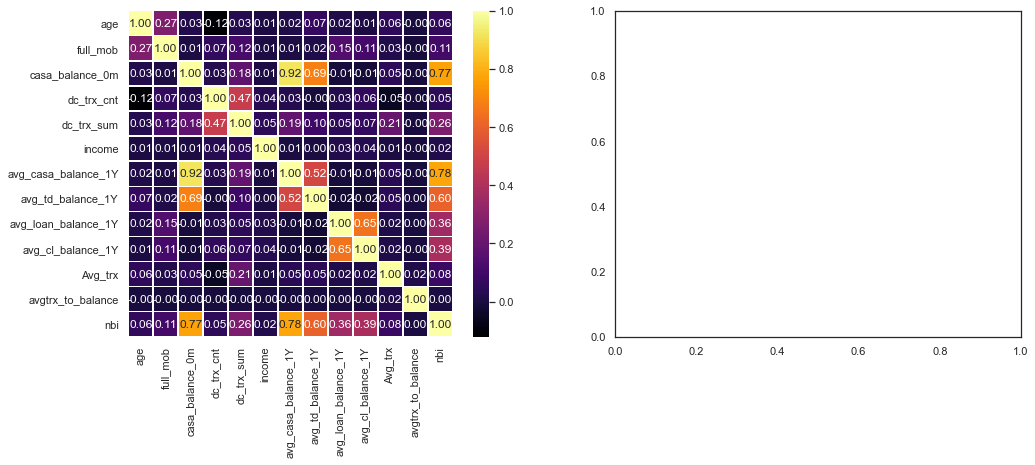

In [81]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6)) 

sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)

### Clustermaps

In [82]:
df.drop(['gender','city_type'],axis=1)

,age,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
5,72,50,93690.801,0,0.00,0.00,93131.782817,0.0,0.000000,0.0,0.000000,0.000000,2433.644326
9,36,154,0.000,83,324947.73,22100.00,893.147500,0.0,38051.374167,0.0,3915.032892,4.383411,6065.052515
10,56,165,1524.580,341,451481.51,36694.37,5844.510000,70000.0,43218.413333,0.0,1323.992698,0.226536,8009.940315
11,19,40,19.650,72,15529.58,1293.60,217.270833,0.0,0.000000,0.0,215.688611,0.992718,684.233442
12,20,3,10338.170,105,126229.83,44169.00,19043.322500,0.0,0.000000,0.0,1202.188857,0.063129,157.694118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,97,0.880,0,0.00,0.00,2003.093333,1325809.0,0.000000,0.0,0.000000,0.000000,13775.933155
49996,58,34,0.000,0,0.00,0.00,0.000000,1000000.0,0.000000,0.0,0.000000,0.000000,8247.466438
49997,34,21,6450.930,73,118358.38,12405.50,9010.019167,0.0,0.000000,0.0,1621.347671,0.179949,1973.128711
49998,43,52,4101.120,0,0.00,0.00,3787.540000,0.0,63442.406667,0.0,0.000000,0.000000,5101.543269


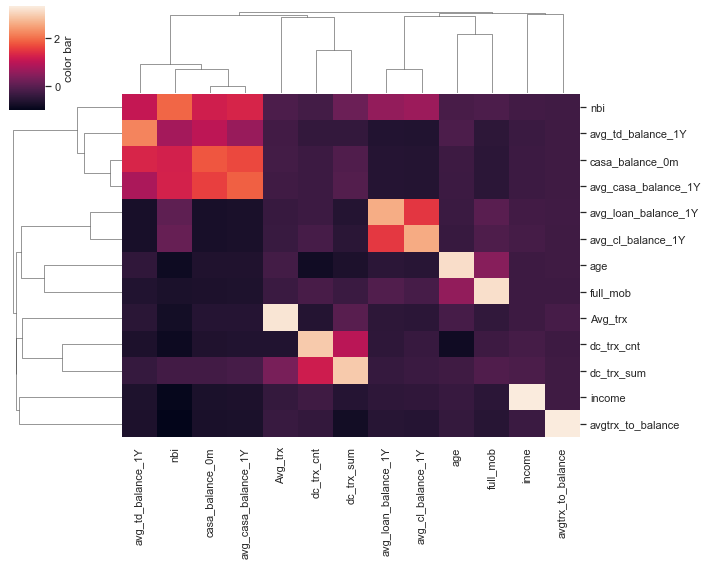

In [83]:

g = sns.clustermap(
    corr, 
    figsize=(10,8),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
)

## Matplotlib

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

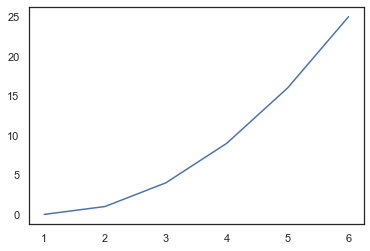

In [85]:
x = [1,2,3,4,5,6]
y = [0,1,4,9,16,25]

plt.plot(x,y)
plt.show()

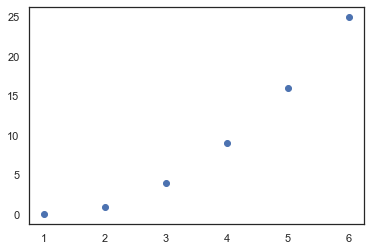

In [86]:
# Точечная диаграмма
plt.scatter(x,y)
plt.show()

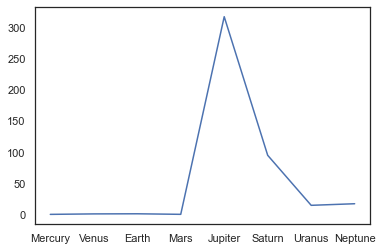

In [87]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars','Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147]
plt.plot(planets, masses)
plt.show()

In [88]:
masses[planets.index('Earth')]/masses[planets.index('Mercury')]

18.091688678221225

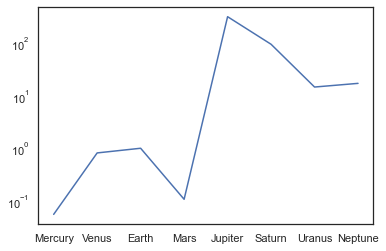

In [89]:
# Логарифмический масштаб
plt.plot(planets, masses)
plt.yscale(value='log')
plt.show()

In [90]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

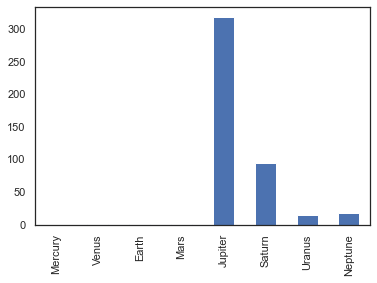

In [91]:
# Столбчатая диаграмма
planet_info.plot(kind='bar')
plt.show()

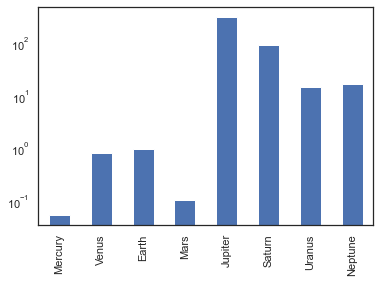

In [92]:
# Логорифмический масштаб
planet_info.plot(kind='bar', logy=True)
plt.show()

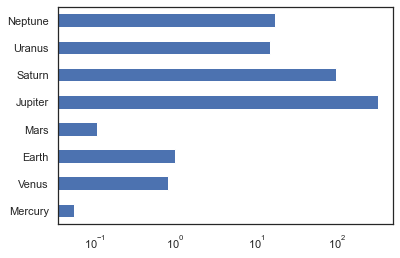

In [93]:
# Меняем ориентацию
planet_info.plot(kind='barh', logx=True)
plt.show()

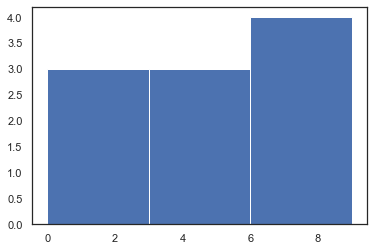

In [94]:
a = [i for i in range(10)]
# Рисуем гистограмму
hist_info = plt.hist(a, bins=3)
# print(hist_info)
plt.show()

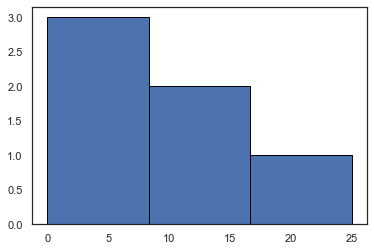

In [95]:
hist_info = plt.hist(y, bins=3, edgecolor='black')
plt.show()

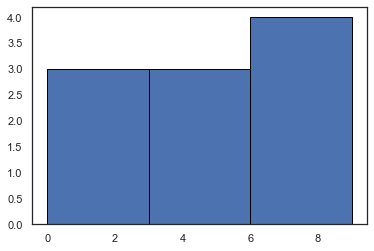

In [96]:
hist_info = plt.hist(a, bins=3, edgecolor='black')
plt.show()

### Индекс Бигмака - неофициальный способ определения паритета покупательной способности

In [97]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv'
bmi = pd.read_csv(url, parse_dates=True)
bmi

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000e+00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000e+00,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000e+00,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.470000e+00,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.700000e+00,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2021-07-01,URY,UYU,Uruguay,225.00,4.400000e+01,5.113636,-0.09493,0.01813,0.07646,0.44146,0.47923,15777.96,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178
1516,2021-07-01,USA,USD,United States,5.65,1.000000e+00,5.650000,0.00000,0.12492,0.18937,0.59265,0.63439,63415.99,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378
1517,2021-07-01,VEN,VES,Venezuela,30164100.00,3.613989e+06,8.346483,0.47725,0.66179,0.75700,1.35275,1.41441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,2021-07-01,VNM,VND,Vietnam,69000.00,2.302850e+04,2.996287,-0.46968,-0.40344,-0.36926,-0.15539,-0.13326,3498.98,3.056909,-0.05846,-0.13770,-0.06799,0.24518,-0.05491


In [98]:
# Выберем ближайший из доступных периодов
from datetime import datetime
bmi.date = pd.to_datetime(bmi.date)
bmi['daysdelta'] = datetime.now() - bmi.date
bmi['daysdelta'] = bmi['daysdelta'].apply(lambda x:x.days)
bmi = bmi[bmi['daysdelta'] == bmi['daysdelta'].min()].copy().reset_index()
bmi.head(2)

,index,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,...,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted,daysdelta
0,1463,2021-07-01,ARE,AED,United Arab Emirates,14.75,3.67315,4.015627,-0.28927,-0.20049,...,0.13194,0.16161,31982.23,4.183747,-0.07801,-0.15560,-0.08734,0.21933,-0.07453,203
1,1464,2021-07-01,ARG,ARS,Argentina,380.00,96.33375,3.944620,-0.30184,-0.21462,...,0.11193,0.14107,8554.64,3.256918,0.16341,0.06551,0.15164,0.53862,0.16781,203


In [99]:
bm_price_series = bmi.set_index('name')['dollar_price']
bm_price_series.head()

name
United Arab Emirates    4.015627
Argentina               3.944620
Australia               4.792962
Azerbaijan              2.324897
Bahrain                 3.978780
Name: dollar_price, dtype: float64

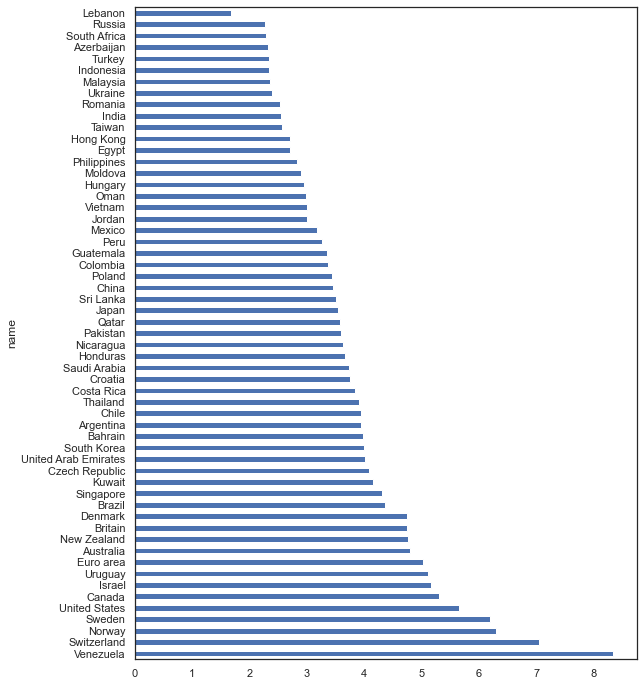

In [100]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
bm_price_series.sort_values(ascending=False).plot(kind='barh')
plt.show()

In [101]:
x = np.linspace(-5,5,101)
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [102]:
x2 = x**2

In [103]:
%config InlineBackend.figure_format = 'svg'

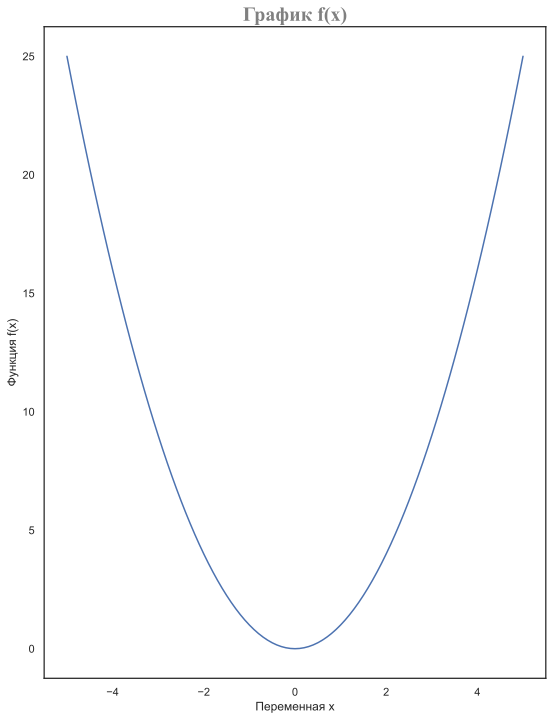

In [104]:
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
              'family':'Times New Roman'}
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict)
plt.xlabel('Переменная x')
plt.ylabel('Функция f(x)')
plt.show()

In [105]:
x3 = x**3

In [106]:
rcParams['figure.figsize'] = 3,4

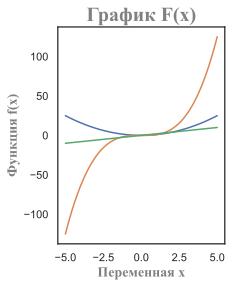

In [107]:
labels_dict = {'fontsize':14, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}

plt.plot(x, x2)
plt.plot(x, x3)
plt.plot(x, x*2)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

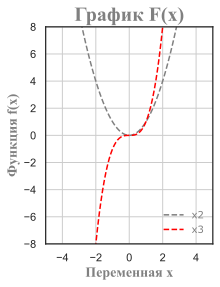

In [108]:
# Добавляем сетку на график
legend_dict = {'family':'Verdana', 'size':10}

plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid()
plt.show()

### ООП подход для графиков 

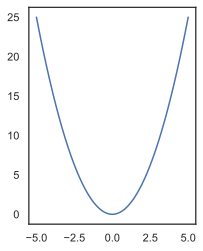

In [109]:
x = np.linspace(-5,5,101)
x2 = list(map(lambda x: x**2, x))

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(x,x2);

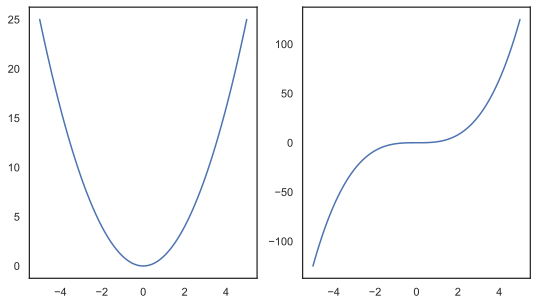

In [110]:
# Созание объектов figure и axes
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(9,5)

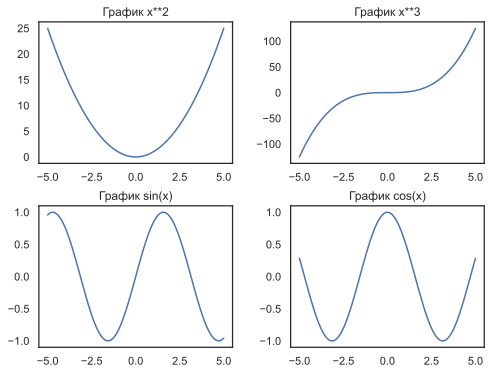

In [111]:
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=False)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )

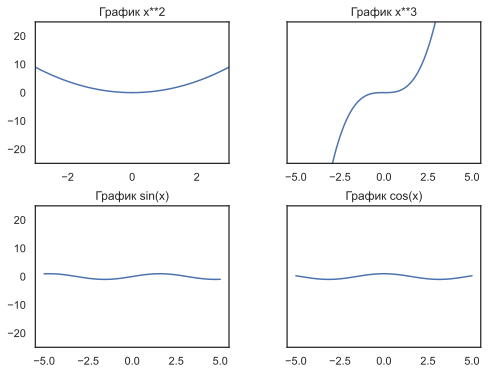

In [112]:
# Корректируем размеры осей у графиков
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax1.set_xlim([-3,3])
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax2.set_ylim([-25,25])
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )